---
title: cheg325 homework1 q4 coding
author: k.wodehouse
date: today
format:
    html:   
        self-contained: true
---

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('ggplot')

I'll bring the data in as arrays and plot it to get a feel for how it looks. I also removed the 2 greatest points since they're quite far from the others

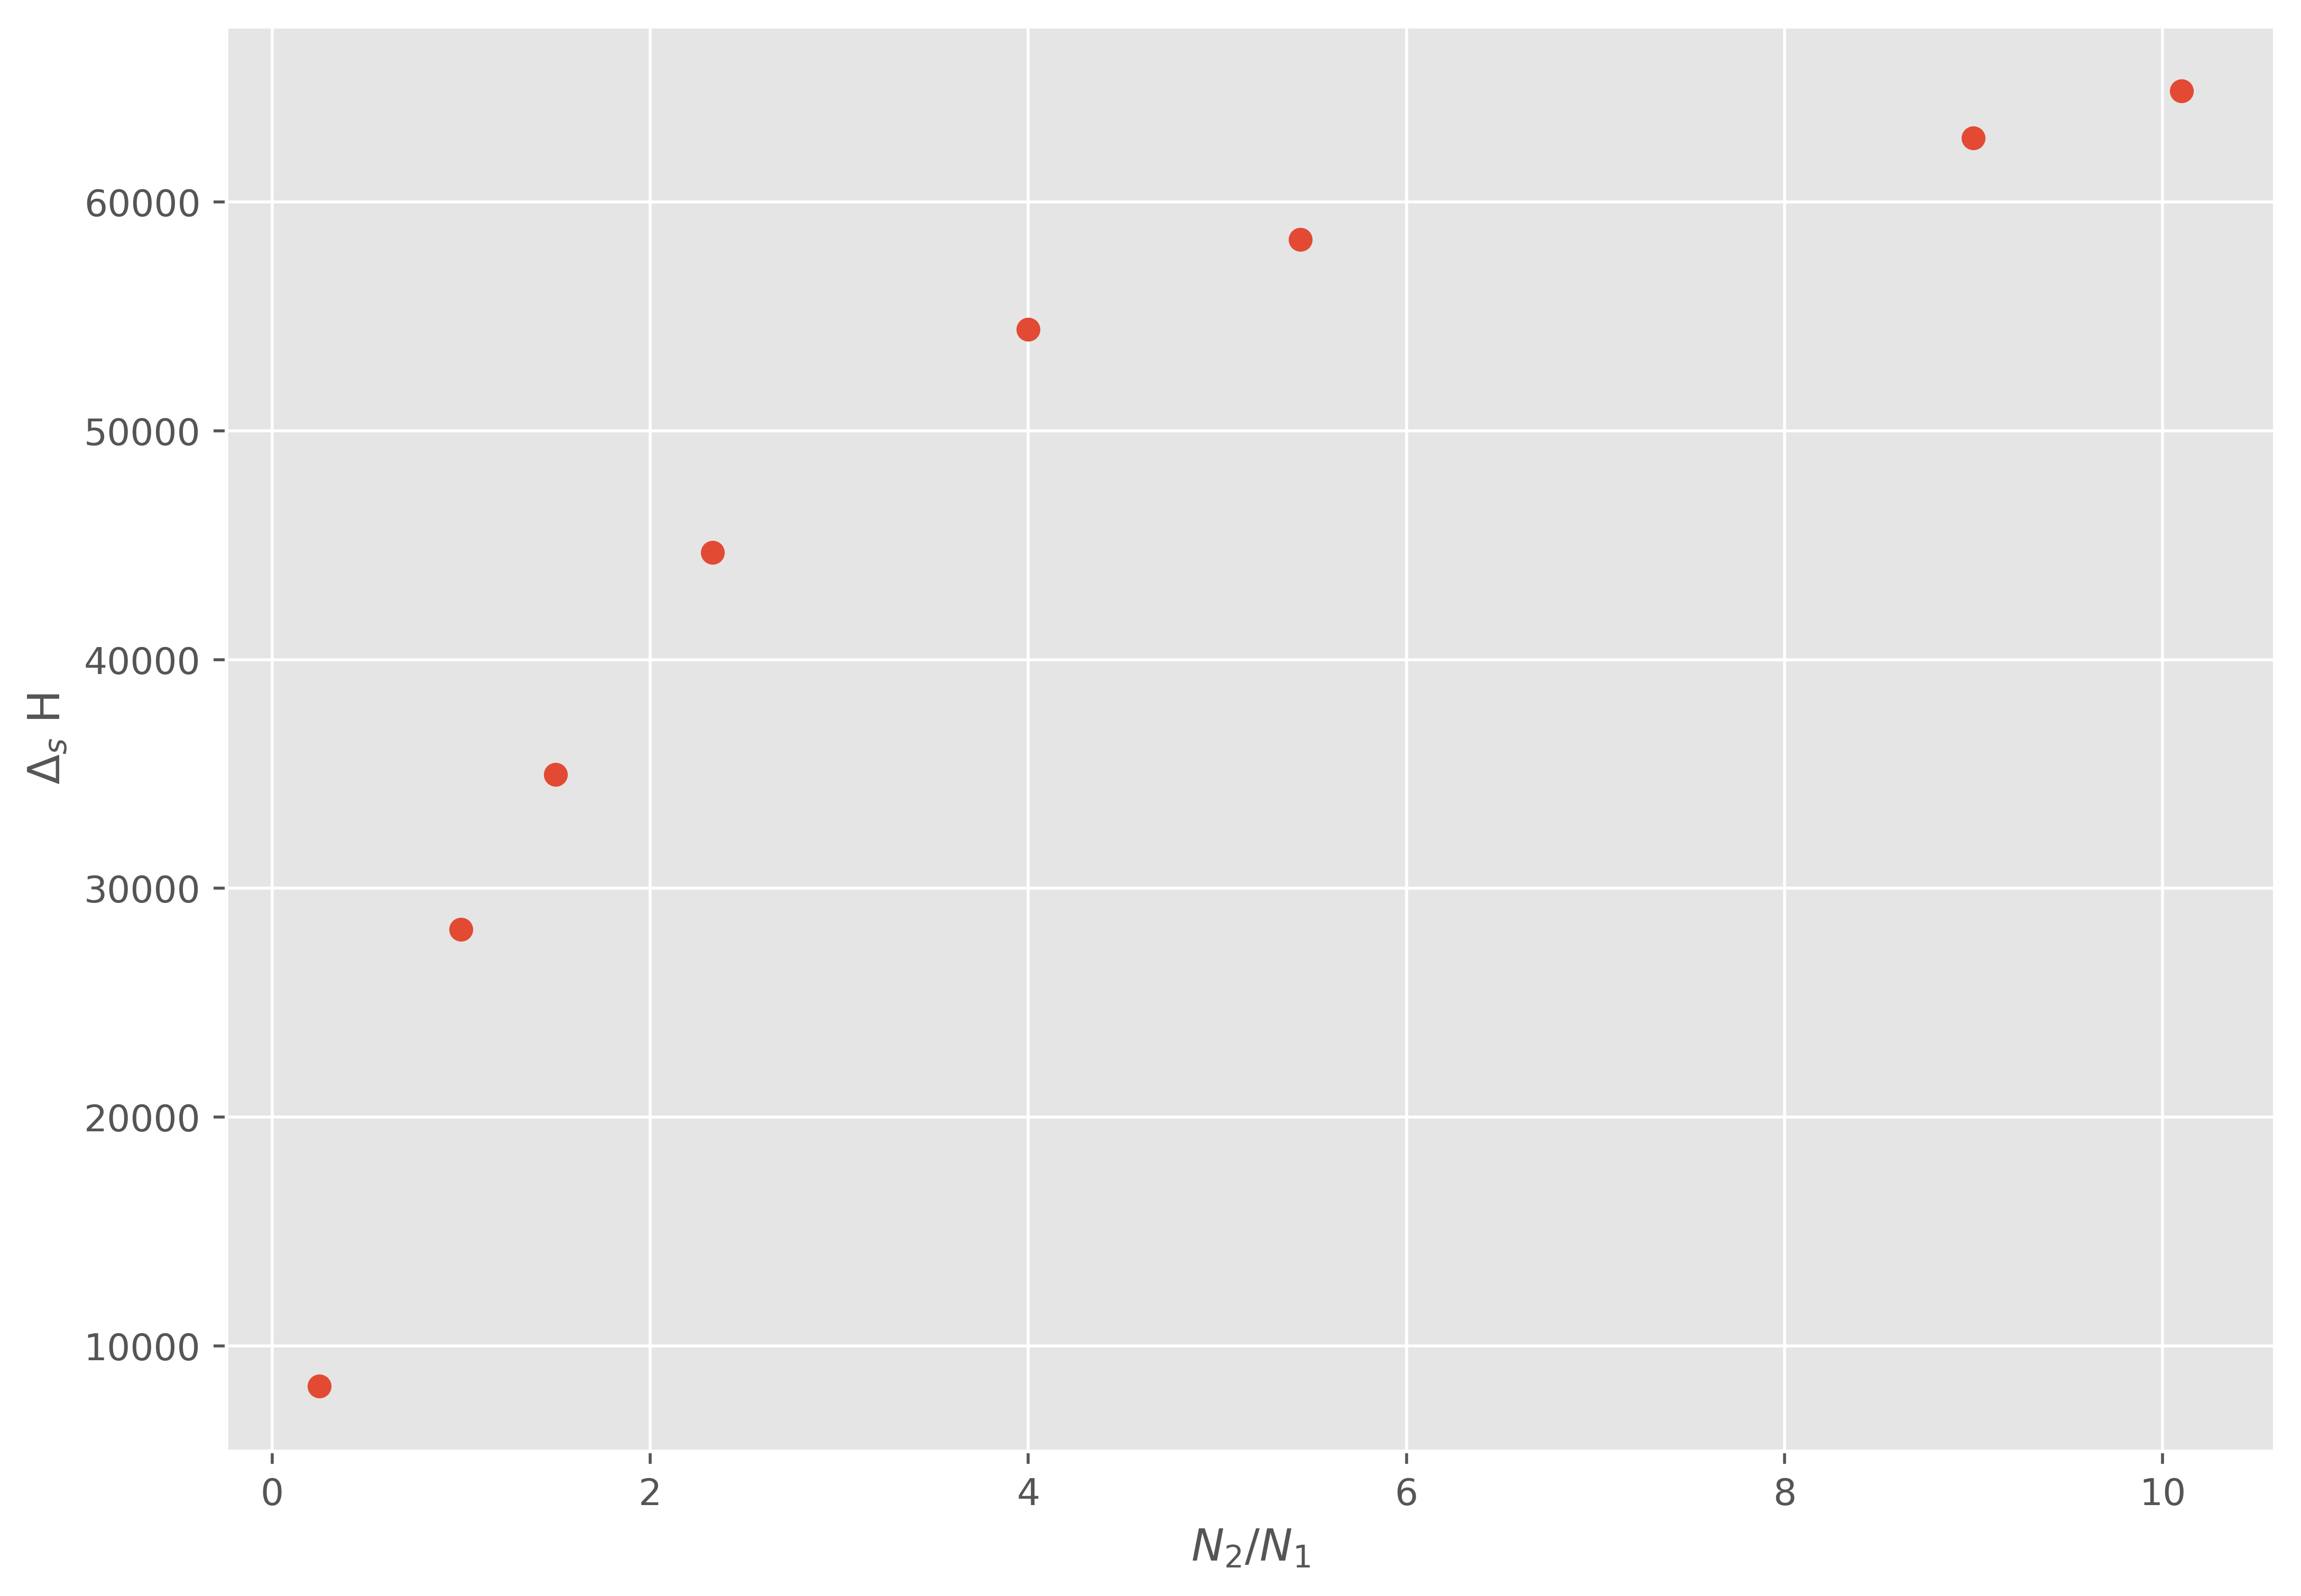

In [187]:
N2 = np.array([0.25, 1.0, 1.5, 2.33, 4.0, 5.44, 9.0, 10.1, ])
delH = np.array([8242, 28200, 34980, 44690, 54440, 58370, 62800, 64850, ])
fig, ax = plt.subplots(figsize=(10,7), dpi=500, subplot_kw={'xlabel':'$N_2 / N_1$', 'ylabel':"$\Delta_s$ H"})
ax.scatter(N2, delH);

after some trial and error, it looks like the equation fits well to this form of equation
$$
y = a + b \cdot \exp \left( c \cdot x^{d} \right)
$$
where ${a,b,c,d}$ are fit parameters and also
$$
y' = b \cdot c \cdot d \cdot x^{d-1} \cdot \exp \left( c \cdot x^{d} \right)
$$

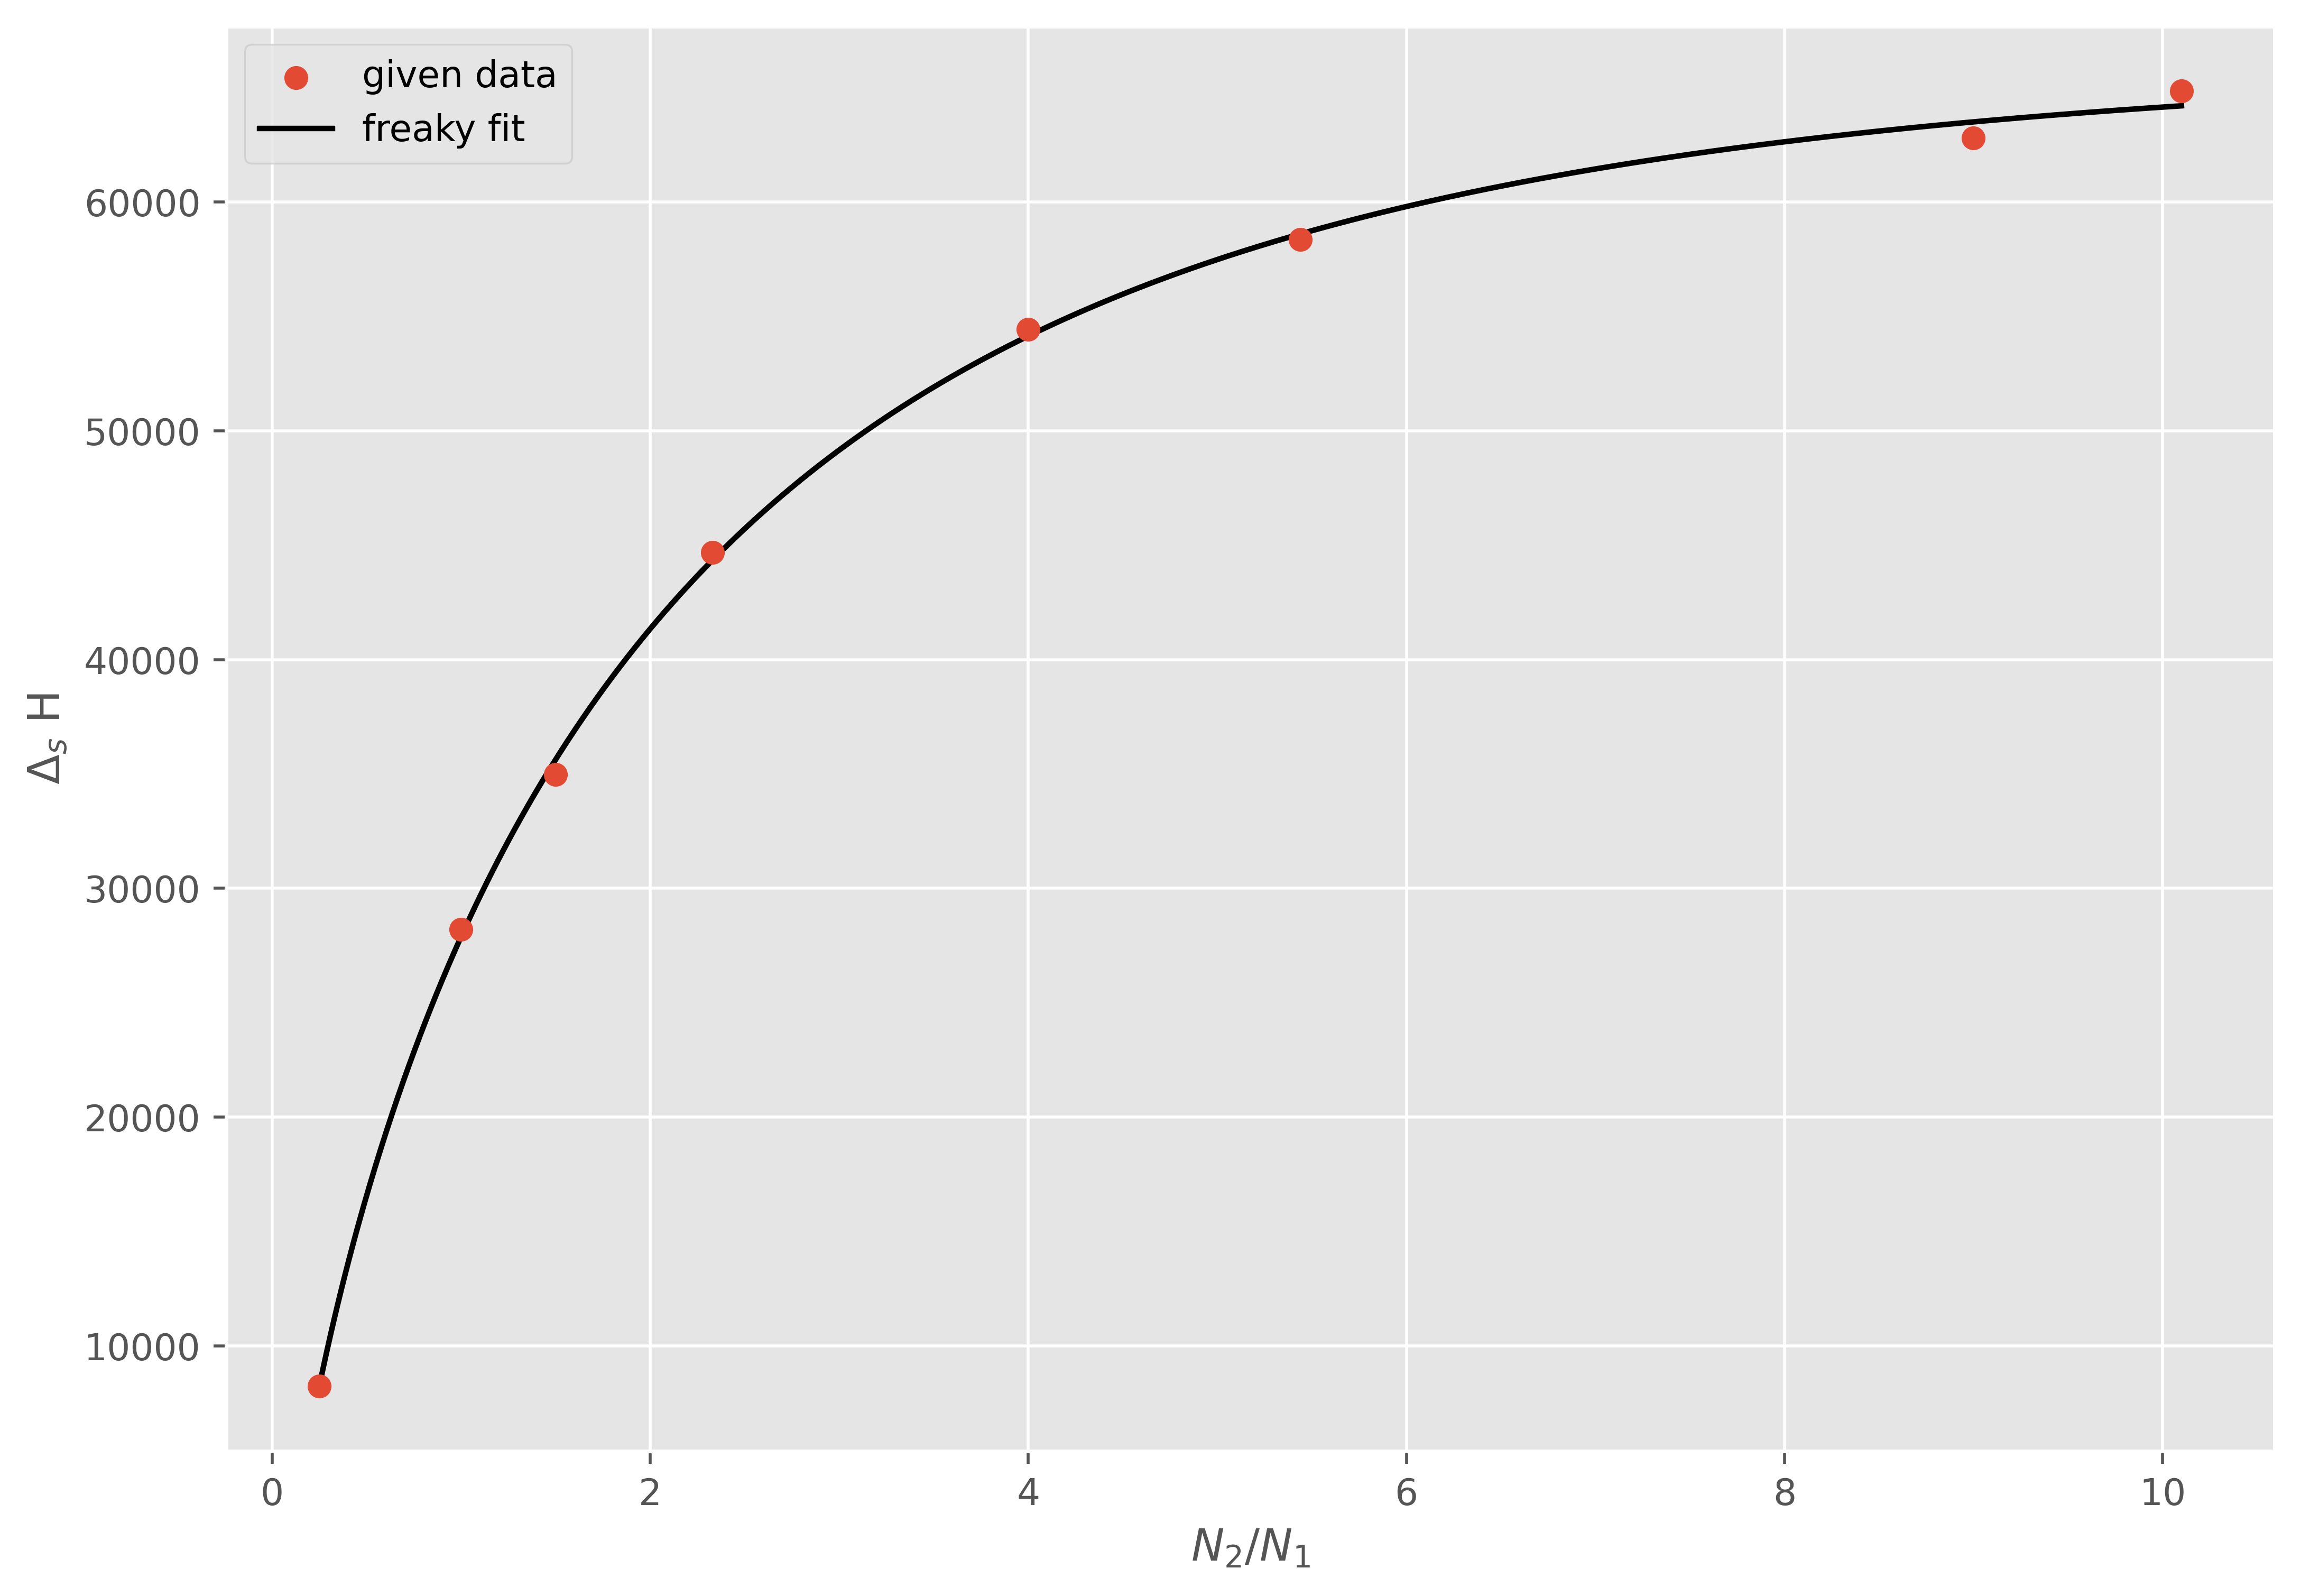

In [188]:
def func(n2, a, b, c, d):
    return a + b * np.exp(c * n2 ** d)

def derivative_func(n2, a, b, c, d):
    return b * c * d * (n2 ** (d-1)) * np.exp(c * n2 ** d)

popt = curve_fit(func, N2, delH, p0=[90000,0,-1, 1])
a, b, c, d = popt[0]

fig, ax = plt.subplots(figsize=(10,7), dpi=500, subplot_kw={'xlabel':'$N_2 / N_1$', 'ylabel':"$\Delta_s$ H"})
ax.scatter(N2, delH, zorder=10)
x = np.linspace(N2.min(), N2.max(),1000)
ax.plot(x, func(x, a, b, c, d), c='black')
ax.legend(['given data', 'freaky fit']);

now that we have a fit and the derivative of the fit, we may evaluate the derivative at 50% and finish up this question.

first, i'll calculate the moles of each and the $N_2 / N_1$

In [189]:
N_acid = 50 / 98.079
N_water = 50 / 18.015
ratio = N_water / N_acid
print(f'mol acid: {N_acid:.4f},\nmol water: {N_water:.4f},\nratio: {ratio:.4f}')

mol acid: 0.5098,
mol water: 2.7755,
ratio: 5.4443


also, remember that the data was given as $- \Delta_s \underline{H}$ and this negative must be accounted for in my final answer

In [190]:
h2_h2 = derivative_func(ratio, a, b, c, d)
print(f'(H2 - H2) = {-h2_h2:.1f}')
h1_h1 = func(ratio, a, b, c, d) - (N_water / N_acid) * h2_h2
print(f'(H1 - H1) = {-h1_h1:.1f}')

(H2 - H2) = -2347.3
(H1 - H1) = -45834.6


so our final result is 
$$
(\bar{H}_2 - \underline{H}_2) = -2347.3 \, \frac{\text{J}}{\text{mol}}
$$
$$
(\bar{H}_1 - \underline{H}_1) = -45834.6 \, \frac{\text{J}}{\text{mol}}
$$